# Main Program for Numerical and Categorical Feature
This program combines the models built for both the numerical and categorical features

function ClickConnect(){
console.log("Working");
document.querySelector("colab-connect-button").shadowRoot.getElementById('connect').click()
}
setInterval(ClickConnect,60000)

In [0]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 5

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy as copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# use tensorflow version 2
%tensorflow_version 2.x

# load the encoder model to be used
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Reshape, Concatenate, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
from tensorflow.keras.layers import PReLU, ReLU, BatchNormalization, ELU
from keras.initializers import Constant
from keras import regularizers


Using TensorFlow backend.


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, explained_variance_score

In [0]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
# for cross validation, we can use Group KFold spliting - GroupShuffleSplit


In [0]:
import sys
sys.path.append('drive/My Drive/Thesis/Collab Notebooks/')

In [0]:
# Applying the Extraction pipeline
# first stage of the pipeline
from extraction_pipeline import *
from category_pipeline import *

In [0]:
# using the latest updated file
#data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_Sorted_Raw_Db_with_RUL.csv", sep=',', low_memory=False)
#ata = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v4_Sorted_Raw_Db_with_RUL_imputed.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/sorted_data_new_full.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/sorted_data_new.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v5_Sorted_Raw_Db_with_RUL_imputed.csv", sep=',', low_memory=False)
#data2 = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/v2_sorted_data_new.csv", sep=',', low_memory=False)


In [0]:
# embedding required data
data_other = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/sorted_data_new_full.csv", sep=',', low_memory=False)


In [0]:
data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)


In [14]:
data.shape

(336677, 447)

In [15]:
data

,BIWEEK_SEND_DATE,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,LX_PMU_P1FH1_SLOPE_X_INDEX_9,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_1,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_10,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_11,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_12,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_13,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_14,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_15,...,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_DAX_AXLE_ARRANGEMENT,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0005_VEHICLE_OPERATION_DIGIT1,VFE_0006_VEHICLE_OPERATION_DIGIT2,VFE_0007_CAB_HEIGHT,VFE_0008_HAS_PTO,LAST_RUN.1
0,2016-06-15,O-774932,16967,31.000000,159.000000,2.850000e+02,2.649000e+03,9.595000e+03,4.263700e+04,3.157360e+05,2.950290e+05,4.182200e+04,1.051900e+04,6.800000e+01,2.450000e+03,2.620000e+02,2.550000e+02,52.000000,15.000000,18.000000,57.000000,22.000000,36.00000,92.000000,2.500000e+01,70.0,19.000000,34.000000,15.000000,36.00000,50.000000,77.000000,33.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,BR-DILW,FAL7.5,2COMP900,4*2,TURBO-S,RAA11,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A1,DRC-AUTO,FSS-LEAF,UPTOENGR,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,AT261,RC-SMOOT,CTILTP-M,EML-BAS,TRACTOR,UEPTT,CABH215,UACTST,ADRC-FL,Low,Med,K,RAL13,RAL13,INTERREG_HAUL,2,8,CABH215,1,2019-05-14 10:32:00
1,2016-07-01,O-774932,16983,957.000000,3324.500000,1.982250e+04,6.584050e+04,2.088930e+05,7.008375e+05,3.023229e+06,2.872055e+06,6.577500e+05,2.111920e+05,7.400000e+01,7.300400e+04,2.384350e+04,3.344500e+03,673.000000,296.000000,80.000000,62.000000,22.000000,36.00000,92.000000,3.800000e+01,70.0,19.000000,41.000000,18.000000,44.50000,71.500000,149.500000,394.000000,32.179487,0.000000,0.205128,0.205128,0.205128,0.0,0.0,...,BR-DILW,FAL7.5,2COMP900,4*2,TURBO-S,RAA11,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A1,DRC-AUTO,FSS-LEAF,UPTOENGR,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,AT261,RC-SMOOT,CTILTP-M,EML-BAS,TRACTOR,UEPTT,CABH215,UACTST,ADRC-FL,Low,Med,K,RAL13,RAL13,INTERREG_HAUL,2,8,CABH215,1,2019-05-14 10:32:00
2,2016-07-15,O-774932,16997,1552.903226,5433.080645,3.508882e+04,1.191920e+05,3.644495e+05,1.196003e+06,5.060461e+06,4.821555e+06,1.116311e+06,3.722153e+05,7.987097e+01,1.330439e+05,4.185156e+04,5.409048e+03,1202.967742,487.709677,119.967742

In [11]:
data_other.shape

(336677, 75)

In [12]:
data_other

,DAY,MONTH,YEAR,VAR_7MA_FRONT_AXLE_TYPE,VAR_DPX_ENGINE_TYPE,VAR_T1X_PTO_ENGINE_MOUNTED_REAR,VAR_4DX_FRONT_BUMPER,VAR_F1X_REAR_AXLE_LOAD,VAR_FTX_GROUND_CLEARANCE_FA,VAR_CKX_VEHICLE_PROFILE,VAR_KTX_ENGINE_EMISSION_CONTROL,VAR_3ZB_TRANSMISSION_PTO_TORQUE_CAP,VAR_QCX_TOPOGRAPHY,VAR_YLX_REAR_SUSPENSION_SYSTEM,VAR_DKX_GROSS_COMBINATION_WEIGHT,VAR_2RB_BATTERY_MAINTENANCE,VAR_FAX_STEERING_WHEEL_POS,VAR_2CX_CAB_VERSION,VAR_2DX_REAR_CAB_SUSPENSION,VAR_GSX_CHASSIS_HEIGHT,VAR_FFX_PUSHER_AXLE_FEATURES,VAR_5CB_AIR_SUSP_FEATURE_SOFTWARE,VAR_2GB_CLUTCHABLE_AIR_COMPRESSOR,VAR_5NX_ENGINE_BLOCK_HEATER,VAR_TAX_REAR_AXLE_RATIO,VAR_A3A_IDLE_SHUTDOWN,VAR_2LX_FRONT_CAB_SUSPENSION,VAR_RUX_GEAR_SHIFTING_SYSTEM,VAR_U3X_BRAKE_FRONT,VAR_T4X_PTO_TRANSM_MOUNTED,VAR_UBX_HYDRAULIC_PUMP_ENG_MTD,VAR_4QB_BODYBUILDER_EL_INTERFCAB_CHAS,VAR_REX_CRANK_CASE_VENTILATION,VAR_78X_TRANSPORT_CYCLE,VAR_T2X_TRANSMISSIONRETARDER_COOLER,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_DAX_AXLE_ARRANGEMENT,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0005_VEHICLE_OPERATION_DIGIT1,VFE_0006_VEHICLE_OPERATION_DIGIT2,VFE_0007_CAB_HEIGHT,VFE_0008_HAS_PTO,T_CHASSIS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O-774932
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O-774932
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O-774932
3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O-774932
4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O-774932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336672,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,2,1,0,2,0,O-781715
336673,1,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,2,1,0,2,0,O-781715
336674,0,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,2,1,0,2,0,O-781715
336675,1,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,2,1,0,2,0,O-781715


## Category Pipeline


In [0]:
# Date transformation
data = extraTrasfromToCategory(data, debug=True)

'''
# Zero Variance removal
data = removeZeroCategory(data)
print ('After all removal pipeline - ',data.shape)
'''

Dtypes are: 
DAY                                  object
MONTH                                object
YEAR                                 object
VFE_0005_VEHICLE_OPERATION_DIGIT1    object
VFE_0006_VEHICLE_OPERATION_DIGIT2    object
VFE_0008_HAS_PTO                     object
dtype: object


"\n# Zero Variance removal\ndata = removeZeroCategory(data)\nprint ('After all removal pipeline - ',data.shape)\n"

In [0]:
# load this information from the save csv file
cat_features_df = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/cat_embedding_details.csv", sep=',', low_memory=False)

In [0]:
data.shape

(19954, 447)

(336677, 449)

In [0]:
# load feature names from db
feature_names_cat = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/feature_names_cat.csv", sep=',', low_memory=False)
feature_names_num = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/feature_names_num.csv", sep=',', low_memory=False)
# fetch the categorical and numerical features
cat_features = feature_names_cat['Categorical'].values
num_features = feature_names_num['Numerical'].values

In [0]:
num_features.shape, cat_features.shape

((362,), (74,))

In [0]:
# Function for assisting in spliting the data
def validationSplit(data_in, split=0.2, toShuffle=False):
  # here we will split the data
  # splitting by chassis
  chassis_data = data_in['T_CHASSIS'].unique()
  # splitting the chassis data
  c_train, c_val = train_test_split(chassis_data, test_size=split, random_state=42, shuffle=toShuffle)
  # extracting out the training and testing
  train_data = data_in[data_in['T_CHASSIS'].isin(c_train)].reset_index(drop=True)
  test_data = data_in[data_in['T_CHASSIS'].isin(c_val)].reset_index(drop=True)
  return train_data, test_data

# Function for assisting in spliting the data
def crossValidationSplit(kfolds=5, split=0.2, toShuffle=False, ):
  # here we will split the data based on their chassis grouping
  ## generating the Group Parameters
  c_split = GroupShuffleSplit(n_splits=kfolds, test_size=0.2, random_state=42)
  '''
  # splitting the data
  for train_idx, test_idx in c_split.split(data.values, groups=chassis_group):
    print("TRAIN:", data.values[train_idx].shape, "TEST:", data.values[test_idx].shape)
  '''
  return c_split

### Numerical Pipeline

#### Learning Pipeline

In [0]:
# here we will load the learned pipeline selected features
# load feature names from db
feature_names_learning = pd.read_csv("/content/drive/My Drive/Thesis/data/Learning Pipeline/Best_Features_from_Feature_Selection.csv", sep=',', low_memory=False)
# fetch the learned features
learned_features = feature_names_learning['Best_100_Feature Names'].values

#### Encoder Pipeline

In [0]:
'''

def create_num_models():
  # load the embedding model
  # identical to the previous one
  vanila_num_model = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Combine_Num_Cat_Pipelines/Vanilla_AE_20.h5")
  denoising_num_model = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Combine_Num_Cat_Pipelines/Denoising_AE.h5")

  # extract out the vanila model
  en_input_layer = Input(shape=(100,), name="en_layer_100")
  output_layer = vanila_num_model.get_layer(name='bottleneck_layer')(en_input_layer)
  # create the encoder model for the vanila model
  encoder_vanila = Model(inputs=en_input_layer, outputs=output_layer, name='20_features_Vanila_Encoder')

  # extract out the denoising model
  en_input_layer = Input(shape=(100,), name="en_layer_100")
  enc_layer_1 = denoising_num_model.get_layer(name='enc_layer_1')(en_input_layer)
  enc_layer_2 = denoising_num_model.get_layer(name='enc_layer_2')(enc_layer_1)
  enc_layer_3 = denoising_num_model.get_layer(name='enc_layer_3')(enc_layer_2)

  #output_layer = vanila_num_model.get_layer(name='bottleneck_layer')(en_input_layer)
  # create the encoder model for the denosing model
  encoder_denosing = Model(inputs=en_input_layer, outputs=enc_layer_3, name='25_features_denosing_Encoder')

  return encoder_vanila, encoder_denosing

'''

'\n\ndef create_num_models():\n  # load the embedding model\n  # identical to the previous one\n  vanila_num_model = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Combine_Num_Cat_Pipelines/Vanilla_AE_20.h5")\n  denoising_num_model = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Combine_Num_Cat_Pipelines/Denoising_AE.h5")\n\n  # extract out the vanila model\n  en_input_layer = Input(shape=(100,), name="en_layer_100")\n  output_layer = vanila_num_model.get_layer(name=\'bottleneck_layer\')(en_input_layer)\n  # create the encoder model for the vanila model\n  encoder_vanila = Model(inputs=en_input_layer, outputs=output_layer, name=\'20_features_Vanila_Encoder\')\n\n  # extract out the denoising model\n  en_input_layer = Input(shape=(100,), name="en_layer_100")\n  enc_layer_1 = denoising_num_model.get_layer(name=\'enc_layer_1\')(en_input_layer)\n  enc_layer_2 = denoising_num_model.get_layer(name=\'enc_layer_2\')(enc_layer_1)\n  enc_layer_3 = denoising_num_model.g

In [0]:
# create the numerical encoding model

#encoder_vanila, encoder_denosing = create_num_models()

In [0]:
encoder_vanila_50 = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Numerical_Encoder_models/Vanilla_Encoder_50.h5",compile= False)
encoder_vanila_40 = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Numerical_Encoder_models/Vanilla_Encoder_40.h5",compile= False)
encoder_vanila_30 = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Numerical_Encoder_models/Vanilla_Encoder_30.h5",compile= False)

encoder_denosing = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Numerical_Encoder_models/Denoising_Encoder.h5",compile= False)
encoder_deep = load_model("/content/drive/My Drive/Thesis/Collab Notebooks/Numerical_Encoder_models/Deep_Encoder.h5",compile= False)

In [0]:
# this function manages the numerical stuffs
# given a data (scaled), it will generate a new representation of that data
def numerical_pipeline(data_in=None, model1=None, model2=None):
  # first extract out the learning pipeline
  data_num = data_in[learned_features].values

  # the encoder model as well - first model
  encoder_1_data = model1.predict(data_num)
  # encoder_2_data = model2.predict(data_num)

  # merge them together
  # encoder_num = np.concatenate((encoder_1_data, encoder_2_data), axis=1)
  
  # that's all here
  return encoder_1_data

### Category Pipeline

In summary, we have a total of 74 categories. 

#### Extras

In [0]:
# Goal
'''
Write a function, when given a categorical variable, it will generate the vector representation for that variable.
In order to achieve that, we first need to map very categorical variable to some numerical index value. This value 
has to be unique and not random. 
'''

def transfromForEmbed(data_cat, cat_feature_name='', cat_mapping=''):
  # find the cat_index for all the features
  def findCatIndex(x):
    return int(cat_mapping[cat_mapping[cat_feature_name] == x][cat_feature_name+'_index'].values[0])
  output = data_cat[cat_feature_name].apply(findCatIndex) 
  return output

def embedTransform(model=None, variable='', cat_feature_name='', cat_mapping='', return_type=1):
  # Given a categorical variable, produce the embedded vector
  # Find the index of the categorical variable in the cat_mapping dataframe
  cat_index = int(cat_mapping[cat_mapping[cat_feature_name] == variable][cat_feature_name+'_index'].values[0])
  if return_type == 0:
    return cat_index
  # fetch the embeddings weights
  pre_embedding = "Embedding_layer_"
  embed_layer = model.get_layer(name=pre_embedding+cat_feature_name)
  embedd_vector = embed_layer.get_weights()[0][cat_index]
  return embedd_vector

def createCatMapping(data_cat):
  # this function will create a mapping dataframe
  cat_size = data_cat.shape[1]
  feature_names = data_cat.columns

  cat_mapping = pd.DataFrame()

  col_mapping_list = list()
  col_mapping_cols = list()
  # try for all dataframes
  for i in range(cat_size):
    col_indexs = list(pd.factorize(data_cat.iloc[:, i].unique())[0])
    # save to list
    col_mapping_list.append(list(data_cat.iloc[:, i].unique()))
    col_mapping_list.append(col_indexs)
    # save the column name as well
    col_mapping_cols.append(feature_names[i])
    col_mapping_cols.append(feature_names[i]+'_index')

  # now we need to save the list to a dataframe
  cat_mapping = pd.DataFrame(col_mapping_list)
  # transpose it
  cat_mapping = cat_mapping.transpose()
  # update the columns names
  cat_mapping.columns = col_mapping_cols

  # save to the dataframe
  cat_mapping.to_csv("drive/My Drive/Thesis/data/Embedding_Data/cat_mappings.csv", sep=',', index=False)

#createCatMapping(data[cat_features]) 

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = TensorBoard(logdir, histogram_freq=1, embeddings_freq=1, embeddings_metadata=embeddings_meta, write_images=True)
tensorboard_callback = TensorBoard(logdir, histogram_freq=1, embeddings_freq=1,
                                   write_images=False)

In [0]:
### Creating the Keras Embeddings Mode

def create_model(saved_model=None):
  # IDs representing 1-hot encodings
  # Need to create the input for all features
  cat_embedding_input_layers = []

  cat_reshape_layers = []
  # Embeddings for the first cat feature
  id_feature = 0
  # create an array of embeddings layers
  cat_embedding_layers = []

  # interate through categorical varaibles
  for id_feature in range(cat_features_df.shape[0]):
    # creating the input layer for the embeddings
    #input_layer = Input(shape=(1,), name="Input_layer_"+cat_features_df.loc[id_feature, 'Feature'])
    input_layer = Input(shape=(1,), name="Input_layer_"+cat_features_df.loc[id_feature, 'Feature'])
    cat_embedding_input_layers.append(input_layer)
    # embedding size 
    layer_embedding_size = cat_features_df.loc[id_feature, 'Embedding_Size']
    # create the embedding layers
    embed_weights = saved_model.get_layer(name="Embedding_layer_"+cat_features_df.loc[id_feature, 'Feature']).get_weights()
    #embedded_layer.trainable = False
    embedded_layer = Embedding(input_dim=cat_features_df.loc[id_feature, 'Cardinality'], output_dim=layer_embedding_size, 
                               name="Embedding_layer_"+cat_features_df.loc[id_feature, 'Feature'], input_length = 1, trainable=False, weights=embed_weights)(input_layer)
    cat_embedding_layers.append(embedded_layer)
    # add a reshape of the embedding layers
    reshape_layer = Reshape(target_shape=(layer_embedding_size,))(embedded_layer)
    # appends the rehshape models together
    cat_reshape_layers.append(reshape_layer)

  ### Create A combined embedding layers only
  combined_emb = Concatenate(axis=1, name='combined_embeddings')(cat_reshape_layers)
  
  ### the output of the combine embedding model is 169 vectors

  ### creating a model based on the trained weights
  model_emb = Model(inputs=cat_embedding_input_layers, outputs=combined_emb, name="Categorical_Embeddings")

  # compile the model - for a regression model
  model_emb.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
  # compile the model - for a classification problem
  # model.compile(loss='binary_crossentropy', optimizer='adam')
  return model_emb

def train_model(model, x_train, y_train, x_test, y_test, epochs, batch_size, early_stop_callback=None, tensorboard_callback=None):
  # fitting the model
  #model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(XTest, yTest), callbacks=[early_stop, tensorboard_callback])
  model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[early_stop_callback, tensorboard_callback])
  return model

In [0]:
## For each run, log an hparams summary with the hyperparameters and final accuracy:
def run(my_model, x_train, y_train, epochs, batch_size, early_stop_callback, tensorboard_log):
  model = None
  model = create_model(my_model)
  model_output = train_model(model, x_train, y_train, epochs, batch_size, early_stop_callback=early_stop_callback, tensorboard_callback=tensorboard_log)
  # do something with the metrics
  return model_output

In [0]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [0]:
def transfromForEmbed(data_cat, cat_feature_name='', cat_mapping='', type=None):
  # find the cat_index for all the features
  def findCatIndex(x):
    return int(cat_mapping[cat_mapping[cat_feature_name] == x][cat_feature_name+'_index'].values[0])
  if type is not None:
    output = findCatIndex(data_cat[cat_feature_name])
    return np.array([output])
  else:
    output = data_cat[cat_feature_name].apply(findCatIndex) 
    return output.values

# function to reformat the input data into the necessary input data for our network to be trained on.
def network_input_process(data_num=None, data_cols=None, y_output=None, input_type=1):
  # create a list of inputs. 
  try:
    cat_size = data_cols.shape[1]
    columns_name = data_cols.columns
    col_type = None
  except:
    cat_size = data_cols.shape[0]
    columns_name = data_cols.index
    col_type = 1

  # define the size of the network list inputs
  network_inputs = [None] * (cat_size)

  # add inputs to the list
  # for the categorical inputs

  for i in range(cat_size):
    #network_inputs[i] = pd.factorize(data_cols.iloc[:, i].values)[0]
    # map each categorical variable to their respective index values
    #print (columns_name[i])
    #network_inputs[i] = transfromForEmbed(data_cols, cat_feature_name=columns_name[i], cat_mapping=cat_mappings, type=col_type)
    network_inputs[i] = data_cols.loc[:, columns_name[i]].values

  return network_inputs, y_output.values

In [0]:
'''
# creating the training inputs
scaler = RobustScaler()
# scale and fit
#scaler.fit(data_t.loc[:, num_features].values)
#data_t.loc[:, num_features] = scaler.transform(data_t.loc[:, num_features].values)
#data_v.loc[:, num_features] = scaler.transform(data_v.loc[:, num_features].values)

# create the requirment for the embedding model
XTrain, yTrain = network_input_process(data_num=None, data_cols=data[cat_features], y_output=data.iloc[:,3])
'''

'\n# creating the training inputs\nscaler = RobustScaler()\n# scale and fit\n#scaler.fit(data_t.loc[:, num_features].values)\n#data_t.loc[:, num_features] = scaler.transform(data_t.loc[:, num_features].values)\n#data_v.loc[:, num_features] = scaler.transform(data_v.loc[:, num_features].values)\n\n# create the requirment for the embedding model\nXTrain, yTrain = network_input_process(data_num=None, data_cols=data[cat_features], y_output=data.iloc[:,3])\n'

#### Embeddings

In order to apply embeddings for out categorical variables. We need to first determine which features are categorical variable and which are not. We need to ensure we caputure all possible cases of the categorical features. 

Okay, then for each categorical variable we need to capture the cardinalty of the feature iteself.

In [0]:
# load the embedding category mappings 
cat_mappings = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/cat_mappings.csv", sep=',', low_memory=False)

# Load the embedding model
embed_model = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_model.h5")
embed_model2 = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_model2.h5")
embed_model_final = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_model_low_mae.h5")

In [0]:
#fetch out the trained embedding model the model
model_embeddings = None
model_embeddings = create_model(saved_model=embed_model_final)

#### Category Encoder

In [0]:
# load the encoder model
encoder_model_embed_85 = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_encoder_85.h5")
encoder_model_embed_43 = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_encoder_43.h5")

In [0]:
# this function manages the numerical stuffs
# given a data (scaled), it will generate a new representation of that data
def categorical_pipeline(data_in=None, data_embed_in=None, model_embed=None, model_encoder=None, cat_type=0):

  if cat_type == 1:
    # means one hotencoding version:
    data_out = pd.get_dummies(data_embed_in, drop_first=True)
    return data_out.values
    
  # create the requirment for the embedding model
  XTrain, yTrain = network_input_process(data_num=None, data_cols=data_embed_in[cat_features], y_output=data_t_embed.iloc[:,3])

  # Embedding Prediction
  embed_data = model_embed.predict(XTrain)

  # the encoder model as well
  encoder_data = model_encoder.predict(embed_data)

  # that's all here
  return embed_data

In [0]:
def dnn_model(input_size):
  ### Create the deep leaning model
  input_layer1 = Input(shape=(input_size,), name="feature_input_layer")
  #encoder_layer1 = Dense(units=85, name='encoder_layer1', activity_regularizer=regularizers.l1(10e-5))(input_encoder)
  dense_layer1 = Dense(units=300, name='dense_layer1' )(input_layer1)
  activation_1 = PReLU(alpha_initializer=Constant(value=0.2))(dense_layer1)
  #activation_1 = ReLU()(dense_layer1)
  droput_layer1 = Dropout(0.2)(activation_1)

  dense_layer2 = Dense(units=300, name='dense_layer2' )(droput_layer1)
  #activation_2 = PReLU(alpha_initializer=Constant(value=0.2), name='dense_layer2_Activation')(dense_layer2)
  activation_2 = PReLU(alpha_initializer=Constant(value=0.2))(dense_layer2)
  #activation_2 = ReLU()(dense_layer2)
  droput_layer2 = Dropout(0.2)(activation_2)

  dense_layer3 = Dense(units=300, name='dense_layer3' )(droput_layer2)
  #activation_3 = PReLU(alpha_initializer=Constant(value=0.2), name='dense_layer3_Activation')(dense_layer3)
  activation_3 = PReLU(alpha_initializer=Constant(value=0.2))(dense_layer3)  
  #activation_3 = ReLU()(dense_layer3)
  droput_layer3 = Dropout(0.2)(activation_3)

  dense_layer4 = Dense(units=300, name='dense_layer4')(droput_layer3)
  activation_4 = PReLU(alpha_initializer=Constant(value=0.2))(dense_layer4)  
  #activation_4 = ReLU()(dense_layer4)
  droput_layer4 = Dropout(0.2)(activation_4)

  dense_layer5 = Dense(units=300, name='dense_layer5' )(droput_layer4)
  #activation_3 = PReLU(alpha_initializer=Constant(value=0.2), name='dense_layer3_Activation')(dense_layer3)
  activation_5 = PReLU(alpha_initializer=Constant(value=0.2))(dense_layer5)  
  #activation_5 = ReLU()(dense_layer5)
  droput_layer5 = Dropout(0.2)(activation_5)

  dense_layer6 = Dense(units=300, name='dense_layer6')(droput_layer5)
  activation_6 = PReLU(alpha_initializer=Constant(value=0.2))(dense_layer6)  
  #activation_6 = ReLU()(dense_layer6)
  droput_layer6 = Dropout(0.2)(activation_6)

  # output layer
  dense_layer7 = Dense(units=1, name='output_layer')(droput_layer6)

  # create the AE model
  rul_model = Model(inputs=input_layer1, outputs=dense_layer7, name="RUL_Prediction_Model")

  # compile the AE model
  rul_model.compile(optimizer='adam', loss='mae', metrics=['mae'])
  return rul_model

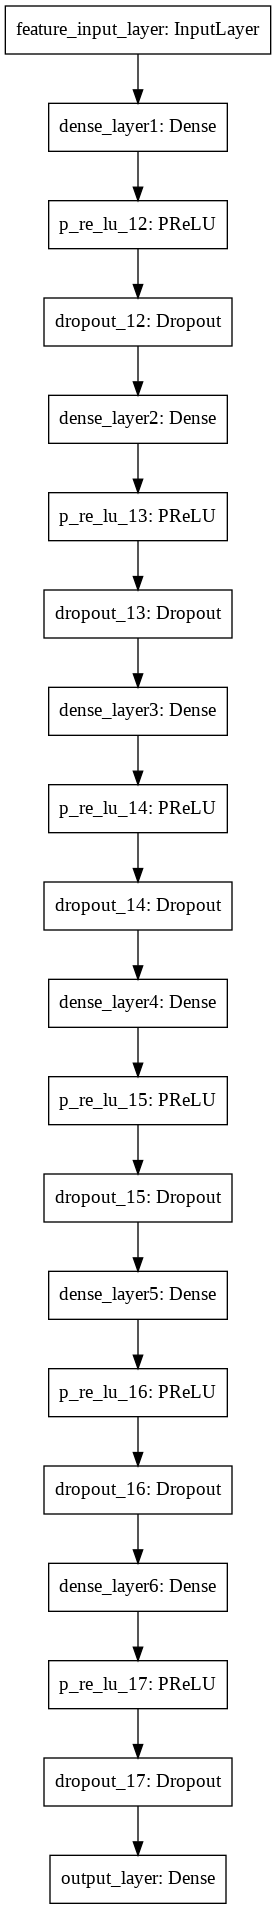

In [0]:
plot_model(dnn_model(93), 'dnn_model.png', show_shapes=False)

In [0]:
def model_results(model_dev=None, testing=None):
  predictions = model_dev.predict(testing)

  # plotting our prediction result
  test_predictions = pd.Series(predictions.reshape(data_test_output.shape[0],))
  pred_df = pd.DataFrame(data_test_output, columns=['True RUL'])
  pred_df = pd.concat([pred_df, test_predictions], axis=1)
  pred_df.columns = ['True RUL', 'Predicted RUL']

  '''
  plt.figure()
  pred_df[:1000].plot(figsize=(20,10))
  plt.xlabel('Data Samples')
  plt.ylabel('RUL')
  plt.title('Random Forest Prediction on AE Embeddings')
  '''

  # mean absolute error for our predictions
  mae_score = mean_absolute_error(pred_df['True RUL'], pred_df['Predicted RUL'])

  # explained variance score
  ep_score = explained_variance_score(pred_df['True RUL'].values, pred_df['Predicted RUL'].values)

  return mae_score, ep_score

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint


# Training and Testing
Here we perform training and testing


#### Train

In [0]:
############# trial approach
input_encoder = Input(shape=(93,), name="encoder_input_layer")
# create the first encoder layer
#encoder_layer1 = Dense(units=85, name='encoder_layer1', activity_regularizer=regularizers.l1(10e-5))(input_encoder)
encoder_layer1 = Dense(units=2, name='encoder_layer1')(input_encoder)

#layer_1 = PReLU(alpha_initializer=Constant(value=0.3), name='enc_layer1_PReLU_Activation')(encoder_layer1)
layer_1 = ReLU()(encoder_layer1)

encoder_model = Model(inputs=input_encoder, outputs=layer_1, name='Encoder_Model')

# decoder 2nd decoder layer
decoder_layer1 = Dense(units=93, name='decoder_layer1')(layer_1)
#layer_2 = PReLU(alpha_initializer=Constant(value=0.3), name='dec_layer1_PReLU_Activation')(decoder_layer1)
layer_2 = ReLU()(decoder_layer1)

#decoder = Model(inputs=input_decoder, outputs=decoder_layer1)

# create the AE model
autoencoder = Model(inputs=input_encoder, outputs=layer_2, name="AutoEncoder_Model")

# compile the AE model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])

In [0]:
## Creating a Combined AE Model

data_t, data_v = validationSplit(data, split=0.2)
data_t.shape, data_v.shape

data_t_embed, data_v_embed = validationSplit(data2, split=0.2)

scaler = StandardScaler()
# perform scaling on the nummerical features
data_scaled = copy.copy(data_t)
data_scaled[num_features] = scaler.fit_transform(data_t[num_features])

# AE combined
# training
data_num_test = numerical_pipeline(data_scaled, model1=encoder_vanila_50)
data_cat_train = categorical_pipeline(data_embed_in=data_t_embed, model_embed=model_embeddings, model_encoder=encoder_model_embed_43)
XTrain = np.concatenate((data_num_test, data_cat_train), axis=1)

# testing
data_scaled = copy.copy(data_v)
data_scaled[num_features] = scaler.fit_transform(data_v[num_features])
data_cat_test = categorical_pipeline(data_embed_in=data_v_embed, model_embed=model_embeddings, model_encoder=encoder_model_embed_43)
data_num_test = numerical_pipeline(data_scaled, model1=encoder_vanila_50)

XTest = np.concatenate((data_num_test, data_cat_test), axis=1)
XTest.shape, XTrain.shape                                     
                                      

((3823, 219), (16131, 219))

In [0]:
early_stop = EarlyStopping(monitor='val_mse', mode='max', verbose=1, patience=3)

In [0]:
autoencoder.summary()

Model: "AutoEncoder_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input_layer (InputLa [(None, 93)]              0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 2)                 188       
_________________________________________________________________
re_lu (ReLU)                 (None, 2)                 0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 93)                279       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 93)                0         
Total params: 467
Trainable params: 467
Non-trainable params: 0
_________________________________________________________________


In [0]:
#autoencoder.fit(XTrain, XTrain, batch_size=128, epochs=100, validation_data=(XTest, XTest), workers=-1, callbacks=[early_stop])

In [0]:
#encoder_model.save("drive/My Drive/Thesis/data/Embedding_Data/encoder_final_2.h5")

In [0]:
chassis_group = data['T_CHASSIS'].values

cv_splits = crossValidationSplit(kfolds=5, split=0.2)

# filepath for saving best models
filepath="rul_weights_best.hdf5"

In [0]:
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import Isomap

In [0]:
hgf

NameError: ignored

In [0]:
# Performing 5 Fold cross validation
cv_splits = crossValidationSplit(kfolds=5, split=0.2)

for dim in [80, 50, 40, 30, 20, 10, 5, 2]:
  mae_score_lists = []
  ep_score_lists = []
  for itera in [1, 2]:
    print ('Running iteration - ', itera)
    print ('################################################')
    print ('################################################')
    cv_count = 0
    for train_idx, test_idx in cv_splits.split(data, groups=chassis_group):
      cv_count = cv_count + 1
      print ("Kfold Cross Validation Count - ", cv_count)
      data_t = data.iloc[train_idx, :].reset_index()
      data_v = data.iloc[test_idx, :].reset_index()
      
      ####
      data_t_embed = data2.iloc[train_idx, :].reset_index()
      data_v_embed = data2.iloc[test_idx, :].reset_index()  
      
      # define the scaler
      scaler = StandardScaler()

      #### Training Data
      # perform scaling on the nummerical features
      data_scaled = copy.copy(data_t)
      data_scaled[num_features] = scaler.fit_transform(data_t[num_features])

      # fetch out the numerical representation
      #data_num_train = numerical_pipeline(data_scaled, model1=encoder_vanila_50)
      data_num_train = data_scaled[num_features].values
      # fetch out the categorical representation
      #data_cat_train = categorical_pipeline(data_embed_in=data_t_embed, model_embed=model_embeddings, model_encoder=encoder_model_embed_43)
      # one hot encoding version of the categorical features
      
      # one hot encoding version of the categorical features
      data_one_hot = pd.get_dummies(data[cat_features], drop_first=True)
      #print ('One Hot Encoding size - ', data_one_hot.shape)
      
      # split data to train and test - For the embedding informtion
      data_t_hot = data_one_hot.iloc[train_idx, :]
      data_v_hot = data_one_hot.iloc[test_idx, :]
      data_cat_train = data_t_hot.values
      
      # merge together
      data_train = np.concatenate((data_num_train, data_cat_train), axis=1)
      #data_train = data_num_train
      data_train_output = data_t['RUL'].values

      print ('Training data - ', data_num_train.shape, data_cat_train.shape, data_train.shape)

      # pass the new data_train to our parallel AE model
      #data_train_final = encoder_model.predict(data_train)

      # for PCA decomposition
      pca = PCA(n_components=dim)
      data_train_final = pca.fit_transform(data_train)
      print ('Training data Final - ', data_train_final.shape)

      #### Testing stage
      data_scaled = copy.copy(data_v)
      data_scaled[num_features] = scaler.transform(data_v[num_features])

      # fetch out the numerical representation
      #data_num_test = numerical_pipeline(data_scaled, model1=encoder_vanila_50)
      data_num_test = data_scaled[num_features].values

      # fetch out the categorical representation
      #data_cat_test = categorical_pipeline(data_embed_in=data_v_embed, model_embed=model_embeddings, model_encoder=encoder_model_embed_43)
      # one hot encoding version of the categorical features
      data_cat_test = data_v_hot.values

      # merge together
      data_test = np.concatenate((data_num_test, data_cat_test), axis=1)
      #data_test = data_num_test
      data_test_output = data_v['RUL'].values
      print ('Testing data - ', data_num_test.shape, data_cat_test.shape, data_test.shape)

      # pass the new data_train to our parallel AE model
      #data_test_final = encoder_model.predict(data_test)
      data_test_final = pca.transform(data_test)
      print ('Testing data Final - ', data_test_final.shape)

      ### Evaluation
      ''' Random Forest model
      regr = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100, criterion='mae', max_depth=100, verbose=1)
      regr.fit(data_train, data_train_output)
      '''
      # DNN model
      # create a checkpoint to save only the best model
      checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=0, save_best_only=True, mode='min')
      rul_model = dnn_model(data_train_final.shape[1])
      early_stop = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=5)
      rul_model.fit(x=data_train_final, y=data_train_output, epochs=100, batch_size=128, verbose=0, validation_data=(data_test_final, data_test_output), workers=-1, callbacks=[early_stop, checkpoint])

      # results
      # evaluate using the best model
      # load the best weights
      rul_model.load_weights(filepath)
      rul_model.compile(optimizer='adam', loss='mae', metrics=['mae'])
      mae_score, ep_score = model_results(model_dev=rul_model, testing=data_test_final)

      print ("Model Score for Fold - ", cv_count)
      print ("MAE: ", mae_score)
      #print ("Explained_Variance: ", ep_score)
      # add score to list
      mae_score_lists.append(mae_score)
      ep_score_lists.append(ep_score)

      print ("++++++++++++++++++++++++++++++++++++++++")

  ########
  print ("#######################################")
  print ("Kfold Cross Validation is Complete. Iteation - ", itera)
  print ("MAE Average Score is : ", np.mean(mae_score_lists))
  print ("MAE List - ", mae_score_lists)
  print ("Explained Variance Average Score is : ", np.mean(ep_score_lists))
  print ("#######################################")


In [0]:
# Performing 5 Fold cross validation
cv_splits = crossValidationSplit(kfolds=5, split=0.2)

for dim in [2]:
  mae_score_lists = []
  ep_score_lists = []
  for itera in [1, 2]:
    print ('Running iteration - ', itera)
    print ('################################################')
    print ('################################################')
    cv_count = 0
    for train_idx, test_idx in cv_splits.split(data, groups=chassis_group):
      cv_count = cv_count + 1
      print ("Kfold Cross Validation Count - ", cv_count)
      data_t = data.iloc[train_idx, :].reset_index()
      data_v = data.iloc[test_idx, :].reset_index()
      
      ####
      data_t_embed = data2.iloc[train_idx, :].reset_index()
      data_v_embed = data2.iloc[test_idx, :].reset_index()  
      
      # define the scaler
      scaler = StandardScaler()

      #### Training Data
      # perform scaling on the nummerical features
      data_scaled = copy.copy(data_t)
      data_scaled[num_features] = scaler.fit_transform(data_t[num_features])

      # fetch out the numerical representation
      #data_num_train = numerical_pipeline(data_scaled, model1=encoder_vanila_50)
      data_num_train = data_scaled[num_features].values
      # fetch out the categorical representation
      #data_cat_train = categorical_pipeline(data_embed_in=data_t_embed, model_embed=model_embeddings, model_encoder=encoder_model_embed_43)
      # one hot encoding version of the categorical features
      
      # one hot encoding version of the categorical features
      data_one_hot = pd.get_dummies(data[cat_features], drop_first=True)
      #print ('One Hot Encoding size - ', data_one_hot.shape)
      
      # split data to train and test - For the embedding informtion
      data_t_hot = data_one_hot.iloc[train_idx, :]
      data_v_hot = data_one_hot.iloc[test_idx, :]
      data_cat_train = data_t_hot.values
      
      # merge together
      data_train = np.concatenate((data_num_train, data_cat_train), axis=1)
      #data_train = data_num_train
      data_train_output = data_t['RUL'].values

      print ('Training data - ', data_num_train.shape, data_cat_train.shape, data_train.shape)

      # pass the new data_train to our parallel AE model
      #data_train_final = encoder_model.predict(data_train)

      # for PCA decomposition
      pca = UMAP(n_components=dim)
      data_train_final = pca.fit_transform(data_train)
      print ('Training data Final - ', data_train_final.shape)

      #### Testing stage
      data_scaled = copy.copy(data_v)
      data_scaled[num_features] = scaler.transform(data_v[num_features])

      # fetch out the numerical representation
      #data_num_test = numerical_pipeline(data_scaled, model1=encoder_vanila_50)
      data_num_test = data_scaled[num_features].values

      # fetch out the categorical representation
      #data_cat_test = categorical_pipeline(data_embed_in=data_v_embed, model_embed=model_embeddings, model_encoder=encoder_model_embed_43)
      # one hot encoding version of the categorical features
      data_cat_test = data_v_hot.values

      # merge together
      data_test = np.concatenate((data_num_test, data_cat_test), axis=1)
      #data_test = data_num_test
      data_test_output = data_v['RUL'].values
      print ('Testing data - ', data_num_test.shape, data_cat_test.shape, data_test.shape)

      # pass the new data_train to our parallel AE model
      #data_test_final = encoder_model.predict(data_test)
      data_test_final = pca.transform(data_test)
      print ('Testing data Final - ', data_test_final.shape)

      ### Evaluation
      ''' Random Forest model
      regr = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100, criterion='mae', max_depth=100, verbose=1)
      regr.fit(data_train, data_train_output)
      '''
      # DNN model
      # create a checkpoint to save only the best model
      checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=0, save_best_only=True, mode='min')
      rul_model = dnn_model(data_train_final.shape[1])
      early_stop = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=5)
      rul_model.fit(x=data_train_final, y=data_train_output, epochs=100, batch_size=128, verbose=0, validation_data=(data_test_final, data_test_output), workers=-1, callbacks=[early_stop, checkpoint])

      # results
      # evaluate using the best model
      # load the best weights
      rul_model.load_weights(filepath)
      rul_model.compile(optimizer='adam', loss='mae', metrics=['mae'])
      mae_score, ep_score = model_results(model_dev=rul_model, testing=data_test_final)

      print ("Model Score for Fold - ", cv_count)
      print ("MAE: ", mae_score)
      #print ("Explained_Variance: ", ep_score)
      # add score to list
      mae_score_lists.append(mae_score)
      ep_score_lists.append(ep_score)

      print ("++++++++++++++++++++++++++++++++++++++++")

  ########
  print ("#######################################")
  print ("Kfold Cross Validation is Complete. Iteation - ", itera)
  print ("MAE Average Score is : ", np.mean(mae_score_lists))
  print ("MAE List - ", mae_score_lists)
  print ("Explained Variance Average Score is : ", np.mean(ep_score_lists))
  print ("#######################################")


In [0]:
dd

In [0]:
########
print ("#######################################")
print ("Kfold Cross Validation is Complete. Total Folds - ", cv_count)
print ("MAE Average Score is : ", np.mean(mae_score_lists))
print ("MAE List - ", mae_score_lists)
print ("Explained Variance Average Score is : ", np.mean(ep_score_lists))
print ("#######################################")

With my own 50 AE, I am getting:
#######################################
Kfold Cross Validation is Complete. Total Folds -  5
MAE Average Score is :  166.98904024892346
MAE List -  [164.91209582825925, 184.3998512223041, 170.17526329773858, 161.18372303771199, 154.27426785860337]
Explained Variance Average Score is :  0.23608884206782074
#######################################

MAE Average Score is :  152.323530681671
MAE List -  [144.99913892086516, 153.9175622306356, 157.8429013264268, 158.7439484995931, 146.11410243083424]
Explained Variance Average Score is :  0.46149730150414514

[152.79084035589736, 164.67501267699487, 145.9169874509911, 162.08565716949948, 143.87037558226544]
153.867774647129

---



MAE List -  [143.6790844776529, 152.57317720448654, 150.20180196303752, 148.66132092107608, 141.44549391159]


Kfold Cross Validation is Complete. Total Folds -  5
MAE Average Score is :  166.67422428659142
MAE List -  [162.3936416305126, 175.5590205381768, 153.3340330050372, 177.5236260111527, 164.56080024807784]
Explained Variance Average Score is :  0.384136792505209
With early stopping of 2

### Evaluation

165.8035277806431 - 6 layers using 300 units